<a href="https://colab.research.google.com/github/Thilak-K21/ML-LAB/blob/main/ML_LAb3_and_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

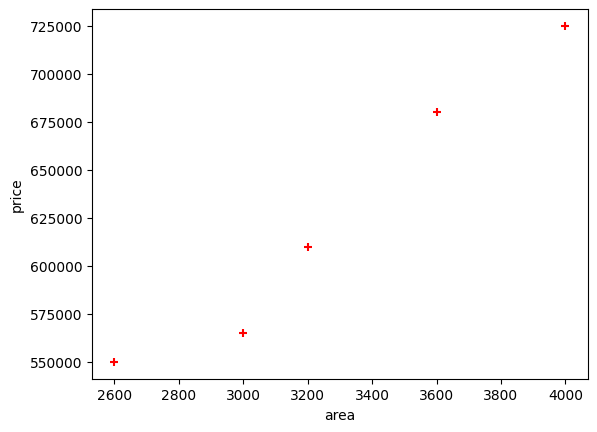

In [2]:
# -*- coding: utf-8 -*-
"""Linear-Regression-Housing_Area_Price.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1CAlZml-P6V2V1RIrodgMfF8L3Ux4V9FT
"""

import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('housing_area_price.csv')
df

# Commented out IPython magic to ensure Python compatibility.
# %matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

new_df = df.drop('price',axis='columns')
new_df

price = df.price
price

# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

"""(1) Predict price of a home with area = 3300 sqr ft"""

reg.predict([[3300]])

reg.coef_

reg.intercept_

"""Y = m * X + b (m is coefficient and b is intercept)"""

3300*135.78767123 + 180616.43835616432

"""(1) Predict price of a home with area = 5000 sqr ft"""

reg.predict([[5000]])

**multiple_lr_homeprice.py**

In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model

# 1. Load Data
df = pd.read_csv('homeprices_Multiple_LR.csv')

# 2. Data Preprocessing: Fill NA values with median
# Note: In newer pandas versions, it's safer to use fillna directly
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())

# 3. Train Model
reg = linear_model.LinearRegression()
# X is the DataFrame containing 'area', 'bedrooms', and 'age'
X = df.drop('price', axis='columns')
y = df.price
reg.fit(X, y)

# 4. Make Prediction
# Passing the data as a DataFrame with feature names to avoid UserWarnings
prediction_input = pd.DataFrame([[3000, 3, 40]], columns=['area', 'bedrooms', 'age'])
price_prediction = reg.predict(prediction_input)

print(f"Predicted Price: {price_prediction[0]}")

# 5. Manual Verification
# Formula: y = m1*x1 + m2*x2 + m3*x3 + b
manual_calc = (reg.coef_[0] * 3000) + (reg.coef_[1] * 3) + (reg.coef_[2] * 40) + reg.intercept_
print(f"Manual Calculation: {manual_calc}")


Predicted Price: 498408.2515803067
Manual Calculation: 498408.2515803067


**Predict canada's per capita income in year 2020. Use the data file canada_per_capita_income.csv file. If required, apply the necessary data processing steps. Using this build a regression model and predict the per capita income for canadian citizens in year 2020**

Predicted per capita income for Canada in 2020: $41288.69
Manual calculation check: $41288.69


[]

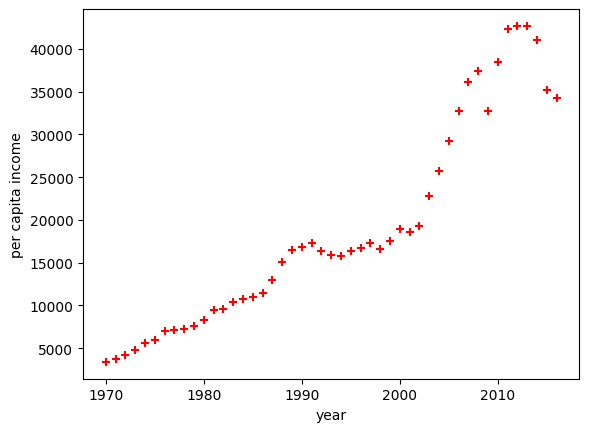

In [23]:
import pandas as pd
import numpy as np
from sklearn import linear_model

df = pd.read_csv('canada_per_capita_income.csv')

df.columns = ['year', 'income']

reg = linear_model.LinearRegression()


reg.fit(df[['year']], df.income)

prediction_df = pd.DataFrame({'year': [2020]})
income_2020 = reg.predict(prediction_df)

print(f"Predicted per capita income for Canada in 2020: ${income_2020[0]:.2f}")


manual_check = reg.coef_[0] * 2020 + reg.intercept_
print(f"Manual calculation check: ${manual_check:.2f}")

plt.xlabel('year')
plt.ylabel('per capita income')
plt.scatter(df.year,df.income,color='red',marker='+')
plt.plot()


**Predict Salary of the employee. Use the data file salary.csv file. If required, apply the necessary data processing steps. Using this build a regression model and predict the salary of the employee with 12 years of experience.**








In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

df = pd.read_csv('salary.csv')

df = df.dropna()

reg = LinearRegression()

X = df[['YearsExperience']]
y = df['Salary']

reg.fit(X, y)


prediction_df = pd.DataFrame({'YearsExperience': [12]})
predicted_salary = reg.predict(prediction_df)

print(f"Predicted Salary for 12 years of experience: ${predicted_salary[0]:,.2f}")


manual_calc = (reg.coef_[0] * 12) + reg.intercept_
print(f"Manual calculation check: ${manual_calc:,.2f}")


Predicted Salary for 12 years of experience: $139,049.67
Manual calculation check: $139,049.67


**Considering the data file hiring.csv. The file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a Multiple Linear Regression model for HR department that can help them decide salaries for future candidates. Using this predict salaries for f**

In [11]:
import pandas as pd
from sklearn import linear_model

df = pd.read_csv('hiring.csv')

df.experience = df.experience.fillna("zero").astype(str).str.lower()

exp_mapping = {
    'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
    'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10, 'eleven': 11
}

df.experience = df.experience.map(exp_mapping)

df.experience = df.experience.fillna(0)
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median())

reg = linear_model.LinearRegression()
features = ['experience', 'test_score(out of 10)', 'interview_score(out of 10)']
reg.fit(df[features], df['salary($)'])

pred1 = pd.DataFrame([[2, 9, 6]], columns=features)
pred2 = pd.DataFrame([[12, 10, 10]], columns=features)

print(f"Salary for Candidate 1: ${reg.predict(pred1)[0]:,.2f}")
print(f"Salary for Candidate 2: ${reg.predict(pred2)[0]:,.2f}")


Salary for Candidate 1: $53,205.97
Salary for Candidate 2: $92,002.18


In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('1000_companies.csv')

X = df[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = df['Profit']

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['State'])], remainder='passthrough')
X_transformed = ct.fit_transform(X)
# dff=pd.DataFrame(df)
# print(dff)

reg = LinearRegression()
reg.fit(X_transformed, y)

def predict_profit(rd, admin, marketing, state):
    test_input = pd.DataFrame([[rd, admin, marketing, state]],
                              columns=['R&D Spend', 'Administration', 'Marketing Spend', 'State'])

    transformed_input = ct.transform(test_input)

    prediction = reg.predict(transformed_input)
    return prediction[0]

profit_a = predict_profit(165349.20, 136897.80, 471784.10, 'New York')
profit_b = predict_profit(160000, 130000, 300000, 'California')

print(f"Predicted Profit (Scenario A): ${profit_a:,.2f}")
print(f"Predicted Profit (Scenario B): ${profit_b:,.2f}")


Predicted Profit (Scenario A): $200,255.35
Predicted Profit (Scenario B): $176,190.56
